# Переход от задачи регрессии к задаче классификации

**Задание:** Построить регрессионную модель спрогнозировать число общей суммы, которую клиенты готовы заплатить за новый автомобиль, с использованием множественной регресии. Датасет можно посмотреть [здесь](https://www.kaggle.com/datasets/dev0914sharma/car-purchasing-model?select=Car_Purchasing_Data.csv).

Ввести граничное значение (экономически выгодное значение стоимости нового автомобиля для компании) и ввести дополнительную колонку (колонку класса) означающую эффективность или нет (1 или 0).

Построить модель классификации для предсказания дней эффективной работы. Сравнить качество моделей предсказания дней эффективной работы (модели регрессии и классификации)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# данные о предложенной покупателями стоимости нового автомобиля
data = pd.read_csv('/content/cars.csv')
data

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,55915.46248
...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,45442.15353


Построим регрессионную модель на наших данных.

ВАЖНО: в данном случае мы строим регресссионную модель для **описания** наших данных, а не для задачи прогноза. Поэтому мы НЕ делим данные на тренировочную и тестовую выборки.

In [ ]:
X = data[['Gender', 'Age', 'Annual Salary', 'Credit Card Debt']]
y = data['Car Purchase Amount']

regressor = LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(X)

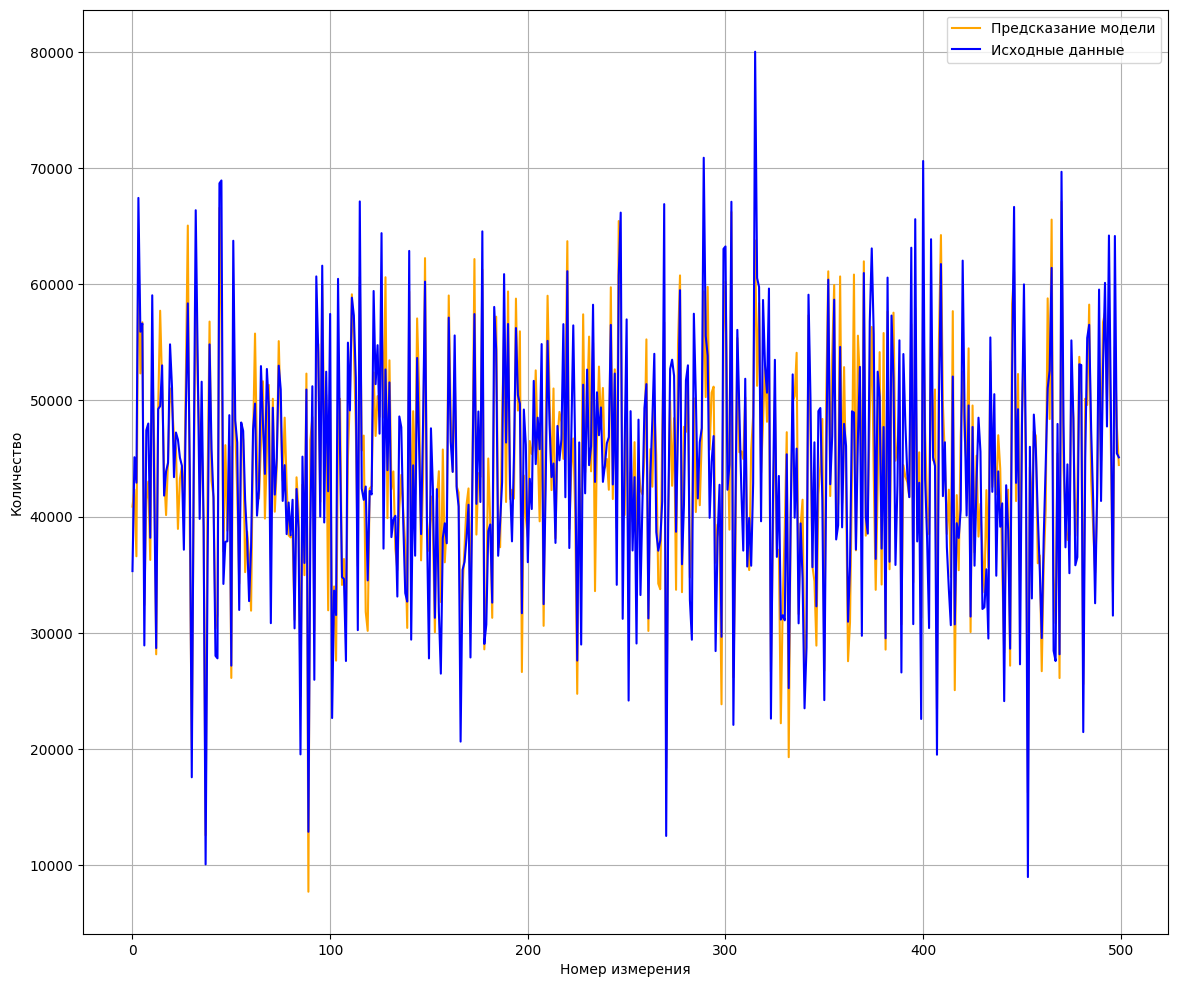

In [ ]:
plt.figure(figsize=(14, 12))

plt.plot(y_pred, color='orange', label='Предсказание модели')
plt.plot(y, color="blue", label='Исходные данные')

plt.grid()
plt.xlabel("Номер измерения")
plt.ylabel("Количество")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(y, y_pred))
mape = np.mean(np.abs((y - y_pred) / y)) * 100
print(f"RMSE={rmse:.2f}, MAE={mean_absolute_error(y, y_pred):.2f}, MAPE={mape:.2f}, R^2={r2_score(y, y_pred):.2f}")

RMSE=5013.65, MAE=4114.03, MAPE=10.01, R^2=0.78


От задачи регрессии перейдём к задаче классификации.

Будем классифицировать по колонке "Car Purchase Amount", в которой содержится информация о стоимости нового автомобиля, которую покупатель готов заплатить. Выделим пороговое значение, по которому будем считать, устраивает ли фирму предложенная стоимость (мы готовы пойти на сделку, класс "1") или нет (класс 0).

In [ ]:
# Создание целевой переменной для классификации
# разделите данные на 2 класс 0 и 1, относительно порога

threshold = y.median()
print(f"Можно пойти на сделку от {threshold}")
y_class = (y > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

Можно пойти на сделку от 43997.78339


Для оценки качества предсказаний моделей мы сначала построим матрицу ошибок (confusion matrix).

Матрица ошибок – это показатель успешности классификации, где классов два или более. Это таблица с 4 различными комбинациями сочетаний прогнозируемых и фактических значений.

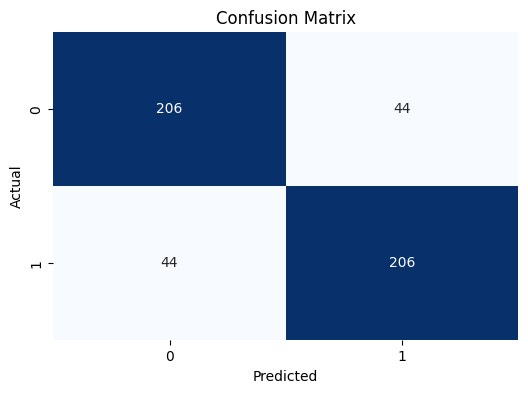

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_pred=y_pred_class, y_true=y_class)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Исходя из полученных значений посчитаем следующие метрики:

- **Accuracy**

Одной из наиболее простых, а поэтому и распространенной метрикой является accuracy (!доля правильных ответов)

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

- **Precision**

Точность, показывает количество истинно положительных исходов из всего набора положительных меток и считается по следующей формуле:

$Precision = \frac{TP}{TP + FP}$

- **Recall**

В русском языке для этого термина используется слово «полнота» или «чувствительность». Эта метрика определяет количество истинно положительных среди всех меток класса, которые были определены как «положительный» и вычисляется по следующей формуле:

$Recall = \frac{TP}{TP+FN}$

- **F-мера** (англ. F-score)

Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок.

Понятно что чем выше точность и полнота, тем лучше. Но в реальной жизни максимальная точность и полнота не достижимы одновременно и приходится искать некий баланс. Поэтому, хотелось бы иметь некую метрику которая объединяла в себе информацию о точности и полноте нашего алгоритма. В этом случае нам будет проще принимать решение о том какую реализацию запускать в производство (у кого больше тот и круче). Именно такой метрикой является F-мера.

F₁-мера — среднее гармоническое между precision и recall:

$F_1 = (\frac{precision^{-1}+recall^{-1}}{2})^{-1} = 2* \frac{precision * recall}{precision + recall}$

Среднее гармоническое взвешенное $F_β$ (F1-мера — частный случай $F_β$-меры для $β = 1$). $F_β$ измеряет эффективность классификатора учитывая recall в $β$ раз более важным чем precision:

$F_β = (1+β^2) \frac{precision * recall}{β^2 * precision + recall}$




In [ ]:
# метрики можно посчитать по отдельности

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

#Рассчитать долю правильных ответов
accuracy = accuracy_score(y_pred=y_pred_class, y_true=y_class)

# Рассчитать точность (precision)
precision = precision_score(y_pred=y_pred_class, y_true=y_class)

# Рассчитать полноту (recall)
recall = recall_score(y_pred=y_pred_class, y_true=y_class)

# Рассчитать F-меру (F-measure)
F_measure = f1_score(y_pred=y_pred_class, y_true=y_class)

# Рассчитать Log loss
Log_loss = log_loss(y_pred=y_pred_class, y_true=y_class)


print(f'''Accuracy: {accuracy:.2f}
Precision: {precision:.2f}
Recall: {recall:.2f}
F1: {F_measure:.2f}
Log loss: {Log_loss:.2f}''')

Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1: 0.82
Log loss: 6.34


**ROC-кривая** (англ. receiver operating characteristic, рабочая характеристика приёмника) — график, позволяющий *оценить качество бинарной классификации*, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак (англ. true positive rate, TPR, называемой чувствительностью алгоритма классификации), и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак (англ. false positive rate, FPR, величина 1-FPR называется специфичностью алгоритма классификации) при варьировании порога решающего правила.

Также известна как **кривая ошибок**. Анализ классификаций с применением ROC-кривых называется ROC-анализом.

*Источник Википедия https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F*

Вариант, как понять ROC-кривую: она описывает взаимосвязь между чувствительностью модели (TPR, или true positives rate — доля истинно положительных примеров) и её специфичностью (описываемой в отношении долей ложноположительных результатов: 1-FPR).

$ TPR = \frac{TP}{P}$, где $P$ - это все положительные результаты, а $TP$ - истинно положительные результаты.

$ FPR = \frac{FP}{N}$, где $N$ - это все негативные результаты, а $FP$ - ложноположительные результаты.

**Обобщая**: вы сравниваете, как чувствительность модели меняется по отношению к ложно положительным долям на разных порогах отсечения. Модель опирается на порог отсечения, чтобы принимать решения по входным данным и относить их к положительным.

*Использованы материалы https://habr.com/ru/companies/netologyru/articles/582756/*

**Площадь под кривой (AUC = Area Under Curve)** — это более сложная метрика точности, которая помогает понять, насколько детерминирована модель. Она описывает, насколько хорошо модель прогнозирует положительный класс, когда фактический результат является положительным.


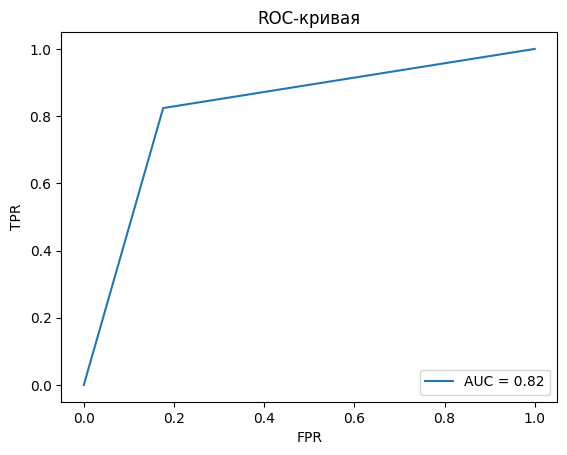

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Рассчитать ROC-кривую
fpr, tpr, thresholds = roc_curve( y_pred_class, y_class)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
roc_auc = roc_auc_score(y_pred_class, y_class)

# Визуализировать ROC-кривую
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
# plt.plot(fpr, color='darkorange')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

Сравним полученные результаты с работой классификатора. Используем KNN классификацию.

Для дальнейшей работы добавим колонку "class" в наш датафрейм.

In [ ]:
data['Class'] = (y > threshold).astype(int)
data

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Car Purchase Amount,Class
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,35321.45877,0
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,45115.52566,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,42925.70921,0
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,67422.36313,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,55915.46248,1
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,48901.44342,1
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,31491.41457,0
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,64147.28888,1
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,45442.15353,1


In [ ]:
# Разделяем данные на обучающий и тестовый наборы
X = data[['Gender', 'Age', 'Annual Salary', 'Credit Card Debt']]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

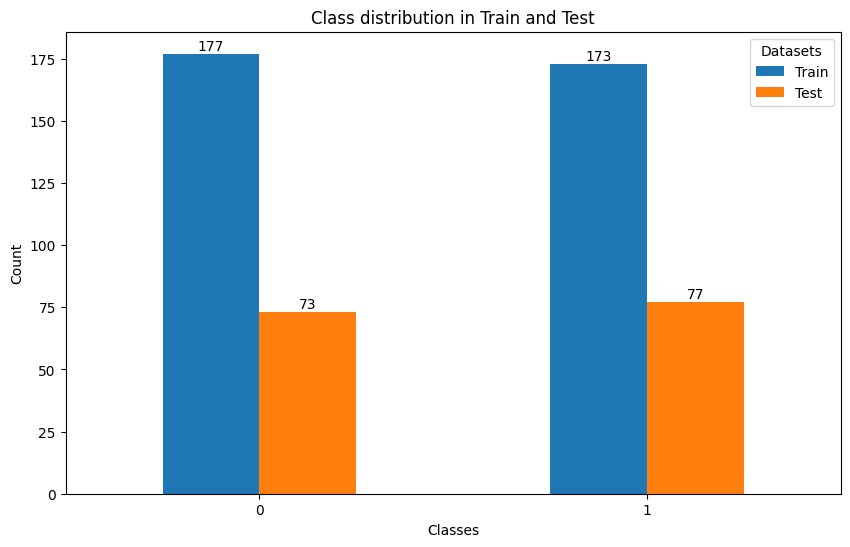

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'Train': y_train.value_counts().sort_index(), 'Test': y_test.value_counts().sort_index()})
ax = df.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Classes')
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)
ax.set_ylabel('Count')
ax.legend(title='Datasets')
ax.set_title('Class distribution in Train and Test')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.25, f'{height}', ha='center', va='bottom')

plt.show()

# kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Создаем и обучаем модель k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Предсказание классов для данных
clss2 = knn_model.predict(X_test)

# Предсказание вероятностей классов для данных
clss3 = knn_model.predict_proba(X_test)

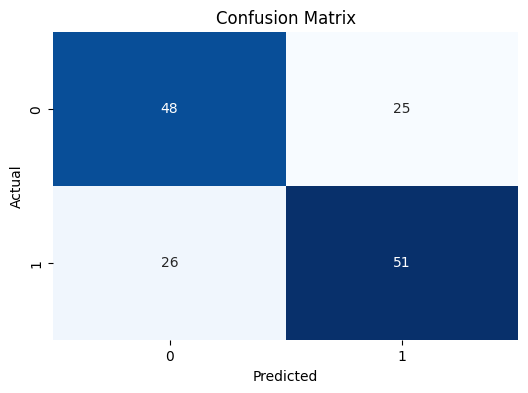

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_pred=clss2, y_true=y_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clss2))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65        73
           1       0.67      0.66      0.67        77

    accuracy                           0.66       150
   macro avg       0.66      0.66      0.66       150
weighted avg       0.66      0.66      0.66       150



In [ ]:
accuracy = accuracy_score(y_pred=clss2, y_true=y_test)
precision = precision_score(y_pred=clss2, y_true=y_test)
recall = recall_score(y_pred=clss2, y_true=y_test)
F_measure = f1_score(y_pred=clss2, y_true=y_test)
Log_loss = log_loss(y_pred=clss2, y_true=y_test)


print(f'''Accuracy: {accuracy:.2f}
Precision: {precision:.2f}
Recall: {recall:.2f}
F1: {F_measure:.2f}
Log loss: {Log_loss:.2f}''')

Accuracy: 0.66
Precision: 0.67
Recall: 0.66
F1: 0.67
Log loss: 12.25


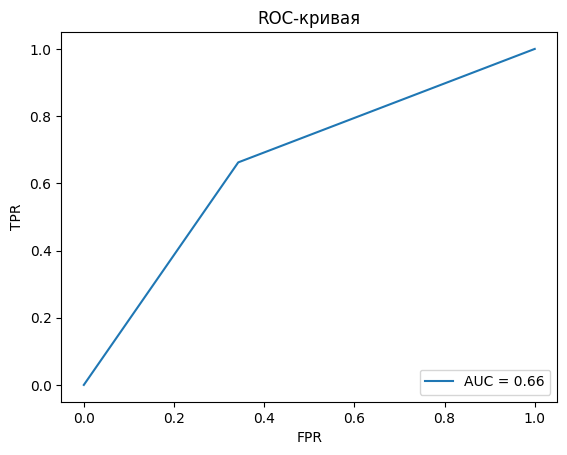

In [ ]:
# Рассчитать ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, clss2)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
roc_auc = roc_auc_score(y_test, clss2)

# Визуализировать ROC-кривую
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
# plt.plot(fpr, color='darkorange')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Создаем и обучаем модель Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Предсказание классов для данных
clss2 = nb_model.predict(X_test)

# Предсказание вероятностей классов для данных
clss3 = nb_model.predict_proba(X_test)

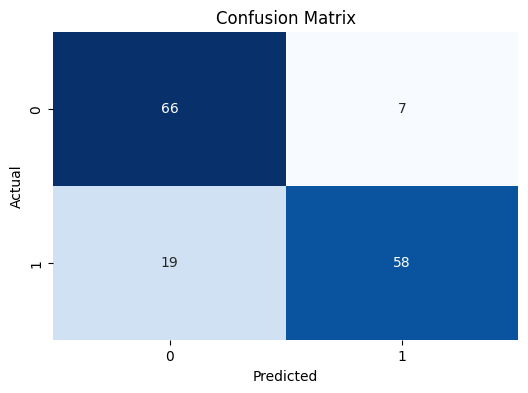

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_pred=clss2, y_true=y_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clss2))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        73
           1       0.89      0.75      0.82        77

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.84      0.83      0.83       150



In [ ]:
accuracy = accuracy_score(y_pred=clss2, y_true=y_test)
precision = precision_score(y_pred=clss2, y_true=y_test)
recall = recall_score(y_pred=clss2, y_true=y_test)
F_measure = f1_score(y_pred=clss2, y_true=y_test)
Log_loss = log_loss(y_pred=clss2, y_true=y_test)


print(f'''Accuracy: {accuracy:.2f}
Precision: {precision:.2f}
Recall: {recall:.2f}
F1: {F_measure:.2f}
Log loss: {Log_loss:.2f}''')

Accuracy: 0.83
Precision: 0.89
Recall: 0.75
F1: 0.82
Log loss: 6.25


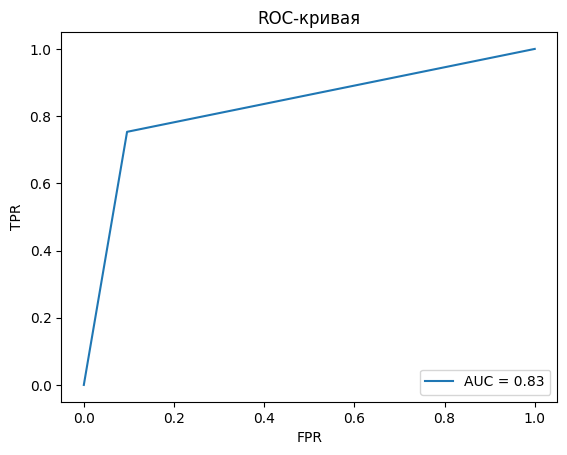

In [ ]:
# Рассчитать ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, clss2)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
roc_auc = roc_auc_score(y_test, clss2)

# Визуализировать ROC-кривую
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
# plt.plot(fpr, color='darkorange')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC

# Создаем и обучаем модель SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Предсказание классов для данных
clss2 = svm_model.predict(X_test)

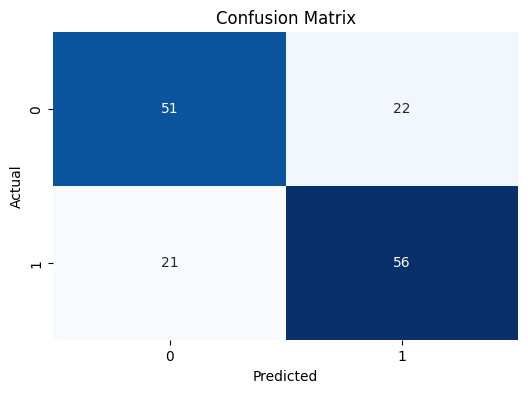

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_pred=clss2, y_true=y_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clss2))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70        73
           1       0.72      0.73      0.72        77

    accuracy                           0.71       150
   macro avg       0.71      0.71      0.71       150
weighted avg       0.71      0.71      0.71       150



In [ ]:
accuracy = accuracy_score(y_pred=clss2, y_true=y_test)
precision = precision_score(y_pred=clss2, y_true=y_test)
recall = recall_score(y_pred=clss2, y_true=y_test)
F_measure = f1_score(y_pred=clss2, y_true=y_test)
Log_loss = log_loss(y_pred=clss2, y_true=y_test)


print(f'''Accuracy: {accuracy:.2f}
Precision: {precision:.2f}
Recall: {recall:.2f}
F1: {F_measure:.2f}
Log loss: {Log_loss:.2f}''')

Accuracy: 0.71
Precision: 0.72
Recall: 0.73
F1: 0.72
Log loss: 10.33


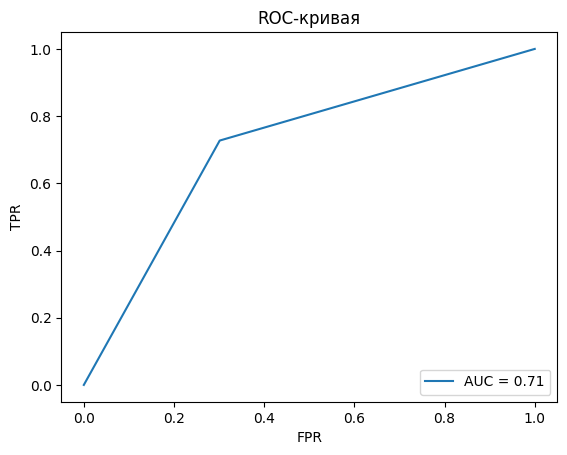

In [ ]:
# Рассчитать ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, clss2)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
roc_auc = roc_auc_score(y_test, clss2)

# Визуализировать ROC-кривую
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
# plt.plot(fpr, color='darkorange')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Создаем и обучаем модель Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Предсказание классов для данных
clss2 = gb_model.predict(X_test)

# Предсказание вероятностей классов для данных
clss3 = gb_model.predict_proba(X_test)

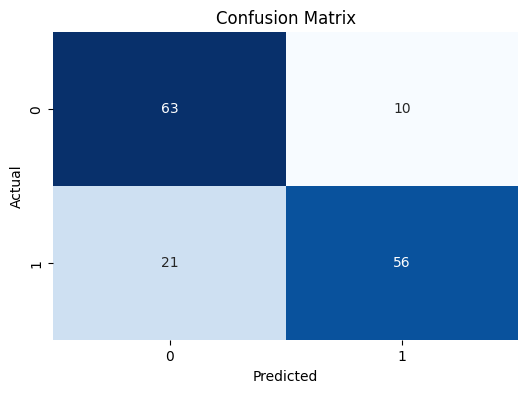

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_pred=clss2, y_true=y_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clss2))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        73
           1       0.85      0.73      0.78        77

    accuracy                           0.79       150
   macro avg       0.80      0.80      0.79       150
weighted avg       0.80      0.79      0.79       150



In [ ]:
accuracy = accuracy_score(y_pred=clss2, y_true=y_test)
precision = precision_score(y_pred=clss2, y_true=y_test)
recall = recall_score(y_pred=clss2, y_true=y_test)
F_measure = f1_score(y_pred=clss2, y_true=y_test)
Log_loss = log_loss(y_pred=clss2, y_true=y_test)


print(f'''Accuracy: {accuracy:.2f}
Precision: {precision:.2f}
Recall: {recall:.2f}
F1: {F_measure:.2f}
Log loss: {Log_loss:.2f}''')

Accuracy: 0.79
Precision: 0.85
Recall: 0.73
F1: 0.78
Log loss: 7.45


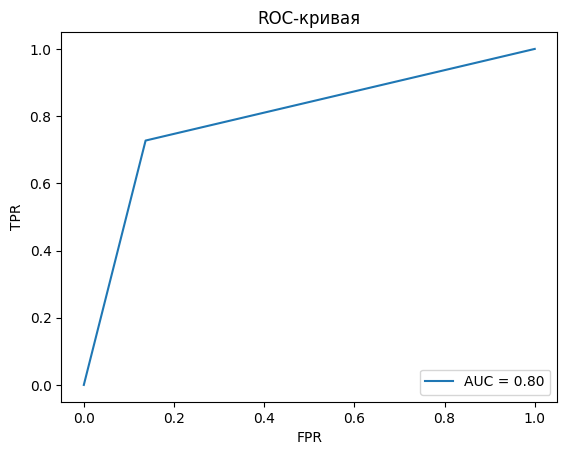

In [ ]:
# Рассчитать ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, clss2)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
roc_auc = roc_auc_score(y_test, clss2)

# Визуализировать ROC-кривую
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
# plt.plot(fpr, color='darkorange')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Создаем и обучаем модель Logistic Regression
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

# Предсказание классов для данных
clss2 = lg_model.predict(X_test)

# Предсказание вероятностей классов для данных
clss3 = lg_model.predict_proba(X_test)

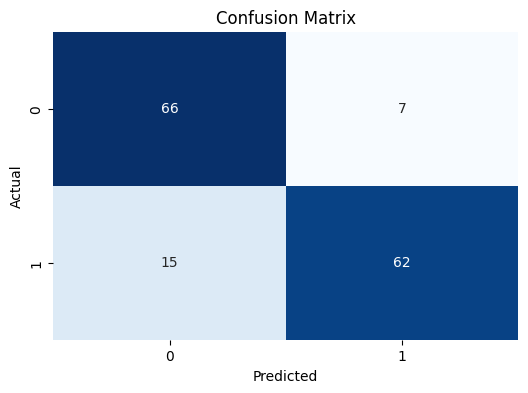

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_pred=clss2, y_true=y_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clss2))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86        73
           1       0.90      0.81      0.85        77

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150



In [ ]:
accuracy = accuracy_score(y_pred=clss2, y_true=y_test)
precision = precision_score(y_pred=clss2, y_true=y_test)
recall = recall_score(y_pred=clss2, y_true=y_test)
F_measure = f1_score(y_pred=clss2, y_true=y_test)
Log_loss = log_loss(y_pred=clss2, y_true=y_test)


print(f'''Accuracy: {accuracy:.2f}
Precision: {precision:.2f}
Recall: {recall:.2f}
F1: {F_measure:.2f}
Log loss: {Log_loss:.2f}''')

Accuracy: 0.85
Precision: 0.90
Recall: 0.81
F1: 0.85
Log loss: 5.29


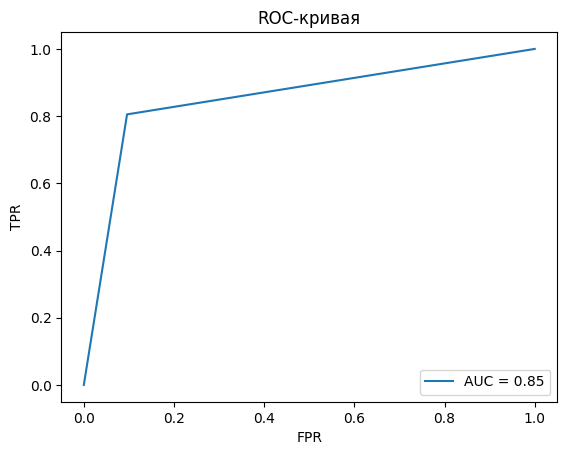

In [ ]:
# Рассчитать ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, clss2)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
roc_auc = roc_auc_score(y_test, clss2)

# Визуализировать ROC-кривую
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
# plt.plot(fpr, color='darkorange')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

# Результат классификации

\begin{array}{|c|c|} \hline
& kNN & NB & SVM & GB & LG \\ \hline
Accuracy & 0.66 & 0.83 & 0.71 & 0.79 & 0.85 \\ \hline
Precision & 0.67 & 0.89 & 0.72 & 0.85 & 0.90 \\\hline
Recall & 0.66 & 0.75 & 0.73 & 0.73 & 0.81 \\ \hline
Fмера & 0.67 & 0.82 & 0.72 & 0.78 & 0.85\\ \hline
Log Loss & 12.25 & 6.25 & 10.33 & 7.45 & 5.29\\ \hline
AUC-ROC & 0.66 & 0.83 & 0.71 & 0.80 & 0.85 \\ \hline
\end{array}


Наилучшие результаты по accuracy показывают LG и NB со значением 0.85 и 0.83, соответственно. Это указывает на то, что они правильно классифицируют объектыв ~85%.

Высокая precision LG и NB говорит о низком количестве ложноположительных результатов, т.е. ~90% предсказанных положительных результатов действительно являются положительными.

Recall показывает, сколько из всех истинных положительных случаев были правильно предсказаны. В данном случае LG (0.81) показывает наилучший результат, эта модель хорошо выявляет истинно положительные случаи.

Что касается F-меры, LG (0.85) и NB (0.82) снова (ожидаемо)) показывают лучшие результаты.

Логарифмическая потеря измеряет качество предсказаний вероятности, где меньшие значения указывают на лучшее качество. Модели с меньшим логарифмическим убытком дают более корректные вероятностные прогнозы. Наилучший результат у LG (5.29), затем следует Наивный Байес (6.25).

Кроме того, NB и LG лучше остальных моделей способны различать классы.

Так, обоснованно логистическая регрессия показала себя наилучшим образом в задачи классификации для предсказывния соответствующей стоимости новых машин.

Худшей моделей показала себя kNN.